In [1]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential

In [2]:
train_data = "./drive/MyDrive/Dataset/train"
validation_data = "./drive/MyDrive/Dataset/validation"

In [3]:
train_data_generator = ImageDataGenerator(horizontal_flip =True, rescale = 1./255,zoom_range=0.2,validation_split=0.1)
validation_data_generator = ImageDataGenerator(rescale=1./255)

In [4]:
train_set = train_data_generator.flow_from_directory(train_data,target_size =(256,256),batch_size = 32,color_mode = 'grayscale',class_mode = 'categorical')
validation_set = validation_data_generator.flow_from_directory(validation_data,target_size = (256,256),batch_size = 32,color_mode='grayscale',class_mode = 'categorical')

Found 1018 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [5]:
model = Sequential()

#Layer-1
model.add(Conv2D(128,(2,2),padding='same',input_shape=(256,256,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer-2
model.add(Conv2D(64,(2,2),padding='same',input_shape=(256,256,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer-3
model.add(Conv2D(32,(2,2),padding='same',input_shape=(256,256,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics= ['accuracy'])

In [7]:
path_Model = "./drive/MyDrive/Dataset.prediction.h5"

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0

In [11]:
checkpoint = ModelCheckpoint(path_Model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]





In [ ]:
history = model.fit(train_set, epochs=10, validation_data=validation_set, callbacks=callbacks_list)

Epoch 1/10
 1/32 [..............................] - ETA: 4:10 - loss: 0.4744 - accuracy: 0.7812

In [16]:
!pip install matplotlib

In [17]:
import matplotlib.pyplot as plt

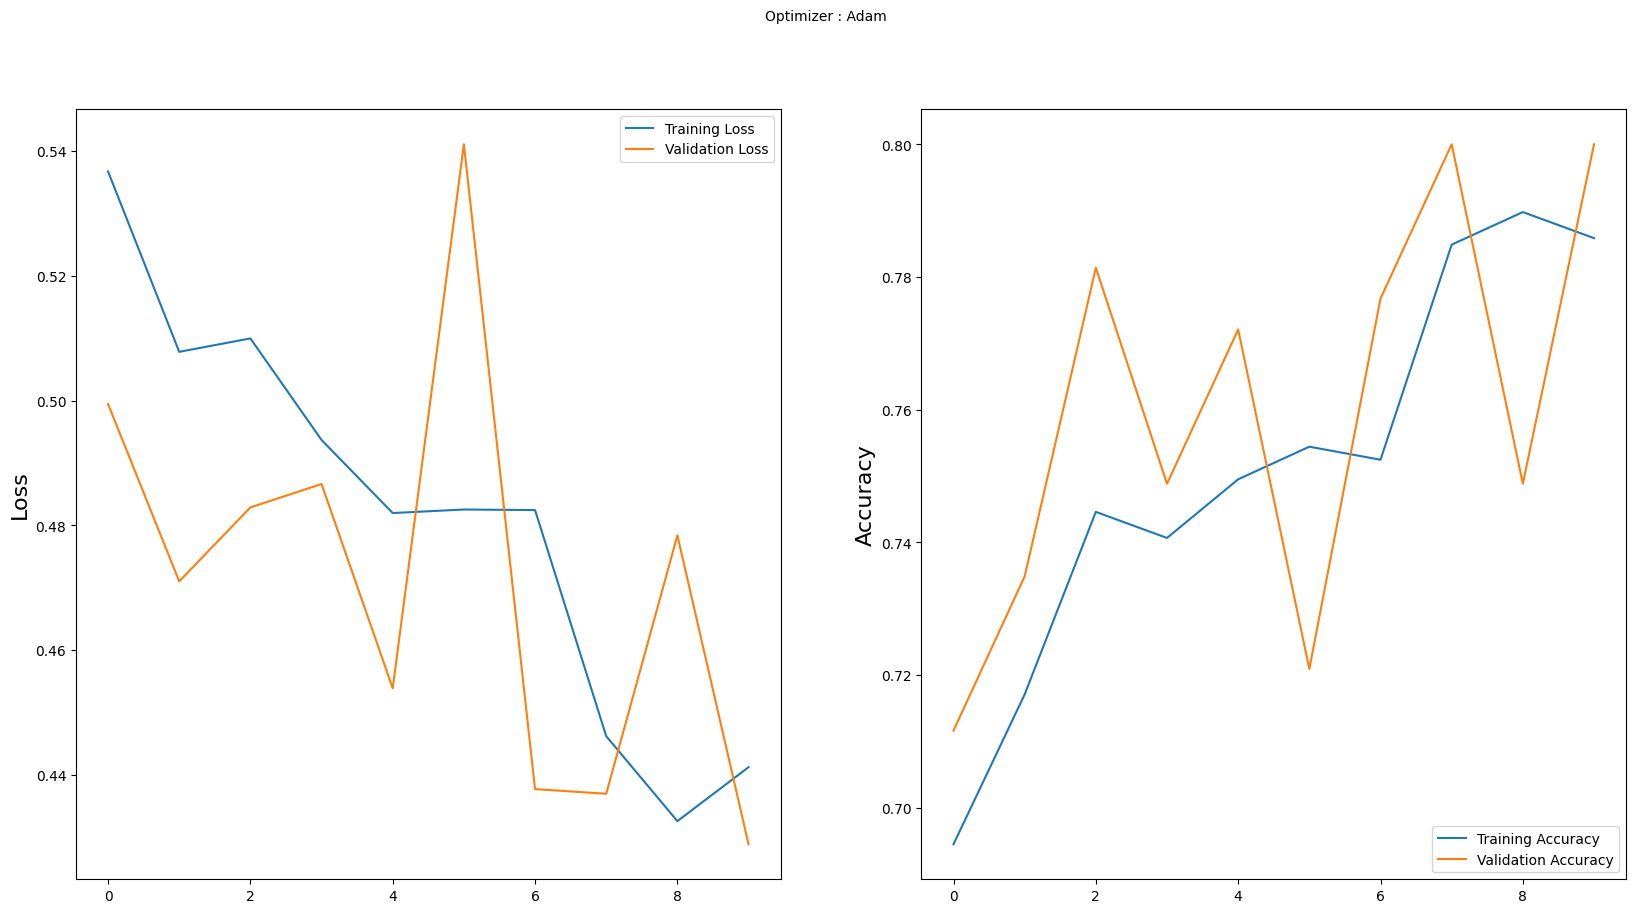

In [18]:
plt.figure(figsize=(20, 10))
plt.suptitle('Optimizer : Adam', fontsize=10)

plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')


In [22]:
print(max(history.history['accuracy']))

0.7897838950157166
